In [1]:
from functools import partial
import sys
# sys.path.append('../src')
import KBio
import numpy as np
import matplotlib.pyplot as plt

import math


In [15]:
# p = KBio.Polynomial(degree = 3, c=0.1)
p = KBio.Gaussian(sigma=5e-1)

In [3]:
np.random.seed(7)

In [4]:

# Define parameters for the 1D Advection simulation
dt = 0.01
nx = 500

nx_coarse = 50
dt_coarse = 0.1

T_final = 1  # Final time
tsteps = math.ceil(T_final / dt)  # Number of time steps
tsteps_coarse = math.ceil(T_final / dt_coarse)  # Number of time steps

# u0 = np.sin(np.linspace(0, 2 * np.pi, nx))  # Initial condition on [0,1]

def u0(x):
    return 1 + np.sin(2 * np.pi * x)

def ux(x):
    return 2 + np.sin(4 * np.pi * x)


# Color equation parameterization
c = 1
def ux_const(x, c=c):
    return c

# Forcing function psi

def psi(t, x):
    # return 0
    return (x ** 2 - t) / 20

# Create a rectangular grid for the simulation
# time, then x.
# u[i, :] is the solution at time i
grid = KBio.rectangular_grid(mins=np.array([0, 0]), maxes=[T_final, 1], n_pts=[tsteps_coarse+1, nx_coarse])

# Create an instance of the Advection1D class
advection_sim = KBio.Advection1D_sim(dt, u0=u0, T_final=T_final, forcing = lambda q,x,t: 0, nx=nx, ux=ux)

# Run the simulation
t_, x_, u_, ffun, ufun = advection_sim(grid, forcing=psi, pyvis=False)


2024-06-05 21:49:06,875 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-05 21:49:06,882 INFO CLAW: Solution 1 computed for time t=0.010000
2024-06-05 21:49:06,888 INFO CLAW: Solution 2 computed for time t=0.020000


2024-06-05 21:49:06,894 INFO CLAW: Solution 3 computed for time t=0.030000
2024-06-05 21:49:06,900 INFO CLAW: Solution 4 computed for time t=0.040000
2024-06-05 21:49:06,906 INFO CLAW: Solution 5 computed for time t=0.050000
2024-06-05 21:49:06,912 INFO CLAW: Solution 6 computed for time t=0.060000
2024-06-05 21:49:06,918 INFO CLAW: Solution 7 computed for time t=0.070000
2024-06-05 21:49:06,924 INFO CLAW: Solution 8 computed for time t=0.080000
2024-06-05 21:49:06,931 INFO CLAW: Solution 9 computed for time t=0.090000
2024-06-05 21:49:06,937 INFO CLAW: Solution 10 computed for time t=0.100000
2024-06-05 21:49:06,943 INFO CLAW: Solution 11 computed for time t=0.110000
2024-06-05 21:49:06,950 INFO CLAW: Solution 12 computed for time t=0.120000
2024-06-05 21:49:06,955 INFO CLAW: Solution 13 computed for time t=0.130000
2024-06-05 21:49:06,961 INFO CLAW: Solution 14 computed for time t=0.140000
2024-06-05 21:49:06,967 INFO CLAW: Solution 15 computed for time t=0.150000
2024-06-05 21:49:06

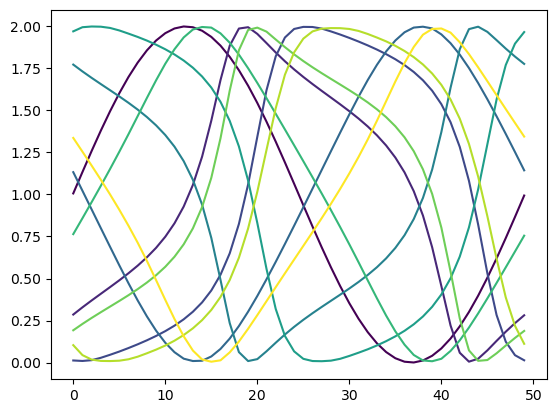

In [5]:
colors = plt.cm.viridis(np.linspace(0, 1, tsteps_coarse))
for t in range(tsteps_coarse):
    # print(t)
    plt.plot(grid.grid_tensors_values[t, :], color=colors[t])

In [370]:
# A simple forcing function to consider

def psi_simple(x, t, b):
    return b * np.sin(6 * np.pi * x) * np.sin(6 * np.pi * t)
    # return b * x  * (1-x) * t * (1 - t)

Use 21x21 grids

In [371]:
# Generate a function that returns the following math calculation
# u(x,a,b) = A1 * exp(-b(x-mu[0])^2) - A1 * exp(-b(x-mu[1])^2)


In [372]:
noise_b_std = 1

In [380]:
n_train = 10
# Anisotropic grid
dt = 0.005
nx = 201
nx_coarse = 30
dt_coarse = 1 / (nx_coarse - 1)
T_final = 1  # Final time
tsteps = math.ceil(T_final / dt)  # Number of time steps
tsteps_coarse = math.ceil(T_final / dt_coarse)  # Number of time steps



# speed_c_values = np.random.normal(2, 0.2, n_train)  * np.random.choice([-1, 1], n_train)
np.random.seed(7)
speed_c_values = np.ones(n_train)
print(speed_c_values)
forcing_b_values = np.random.normal(10, noise_b_std, n_train)
# x_max = 0.5

# mu_parameters = np.random.gamma(shape=4, scale=0.1, size=(n_train,2))
# b_parameters = np.random.gamma(shape=32, scale=0.2, size=(n_train,2))
mu_parameters = np.ones((n_train, 2)) * 0.5
mu_parameters[:,0] += 0.25
mu_parameters[:,1] -= 0.25

b_parameters = np.ones((n_train, 2)) * 5
# def u0(x):
#     return 1 + np.sin(2 * np.pi * x)

def ux(x, c):
    return c * (2 + np.sin(4 * np.pi * x)) / 2

def u(x, mu0, mu1, b0, b1):
    return  np.exp(-b0 * (x - mu0) ** 2) - np.exp(-b1 * (x - mu1) ** 2)

u0_funcs = [partial(u, mu0=mu_parameters[i,0], mu1=mu_parameters[i,1], b0=b_parameters[i,0], b1=b_parameters[i,1]) for i in range(n_train)]

forcings = [partial(psi_simple, b=b) for b in forcing_b_values]
speed_functions = [partial(ux, c=c) for c in speed_c_values]
# sim = KBio.Advection1D_sim(dt, u0=u0, T_final=T_final, forcing = lambda t, x: 0, nx=nx, ux=ux)
grid_train = [KBio.rectangular_grid(mins=np.array([0, 0]), maxes=[T_final, 1], n_pts=[tsteps_coarse+1, nx_coarse]) for _ in range(n_train)]
sim = KBio.Advection1D_sim(dt, u0=u0, T_final=T_final, forcing = lambda q,x,t: 0, nx=nx, ux=ux)

for grid, fn, u0, ux in zip(grid_train, forcings, u0_funcs, speed_functions):
    sim(grid, forcing = fn, u0=u0, ux=ux)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Using custom u0
2024-06-05 22:52:38,605 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-05 22:52:38,607 INFO CLAW: Solution 1 computed for time t=0.005000
2024-06-05 22:52:38,609 INFO CLAW: Solution 2 computed for time t=0.010000
2024-06-05 22:52:38,610 INFO CLAW: Solution 3 computed for time t=0.015000
2024-06-05 22:52:38,612 INFO CLAW: Solution 4 computed for time t=0.020000
2024-06-05 22:52:38,613 INFO CLAW: Solution 5 computed for time t=0.025000
2024-06-05 22:52:38,614 INFO CLAW: Solution 6 computed for time t=0.030000
2024-06-05 22:52:38,616 INFO CLAW: Solution 7 computed for time t=0.035000
2024-06-05 22:52:38,617 INFO CLAW: Solution 8 computed for time t=0.040000
2024-06-05 22:52:38,618 INFO CLAW: Solution 9 computed for time t=0.045000
2024-06-05 22:52:38,620 INFO CLAW: Solution 10 computed for time t=0.050000
2024-06-05 22:52:38,621 INFO CLAW: Solution 11 computed for time t=0.055000
2024-06-05 22:52:38,623 INFO CLAW: Solution 12 com

2024-06-05 22:52:38,660 INFO CLAW: Solution 37 computed for time t=0.185000
2024-06-05 22:52:38,661 INFO CLAW: Solution 38 computed for time t=0.190000
2024-06-05 22:52:38,663 INFO CLAW: Solution 39 computed for time t=0.195000
2024-06-05 22:52:38,664 INFO CLAW: Solution 40 computed for time t=0.200000
2024-06-05 22:52:38,665 INFO CLAW: Solution 41 computed for time t=0.205000
2024-06-05 22:52:38,667 INFO CLAW: Solution 42 computed for time t=0.210000
2024-06-05 22:52:38,669 INFO CLAW: Solution 43 computed for time t=0.215000
2024-06-05 22:52:38,670 INFO CLAW: Solution 44 computed for time t=0.220000
2024-06-05 22:52:38,672 INFO CLAW: Solution 45 computed for time t=0.225000
2024-06-05 22:52:38,673 INFO CLAW: Solution 46 computed for time t=0.230000
2024-06-05 22:52:38,675 INFO CLAW: Solution 47 computed for time t=0.235000
2024-06-05 22:52:38,676 INFO CLAW: Solution 48 computed for time t=0.240000
2024-06-05 22:52:38,677 INFO CLAW: Solution 49 computed for time t=0.245000
2024-06-05 2

In [381]:
n_test = 20
# Anisotropic grid
# dt = 0.02
# nx = 50
# T_final = 1  # Final time
# tsteps = math.ceil(T_final / dt)  # Number of time steps
np.random.seed(1238914)
# speed_c_values_test = np.random.normal(2, 0.2, n_test) * np.random.choice([-1, 1], n_test)
speed_c_values_test = np.ones(n_test)
print(speed_c_values_test)
forcing_b_values = np.random.normal(10, noise_b_std, n_test)
x_max = 0.5

sim = KBio.Advection1D_sim(dt, u0=u0, T_final=T_final, forcing = lambda t, x: 0, nx=nx, ux=ux)

forcings_test = [partial(psi_simple, b=b) for b in forcing_b_values]

mu_parameters = np.ones((n_test, 2)) * 0.5
mu_parameters[:,0] += 0.25
mu_parameters[:,1] -= 0.25
b_parameters = np.ones((n_test, 2)) * 5


u0_funcs_test = [partial(u, mu0=mu_parameters[i,0], mu1=mu_parameters[i,1], b0=b_parameters[i,0], b1=b_parameters[i,1]) for i in range(n_test)]

def ux(x, c):
    return c * (2 + np.sin(4 * np.pi * x)) / 2

def u(x, mu0, mu1, b0, b1):
    return  np.exp(-b0 * (x - mu0) ** 2) - np.exp(-b1 * (x - mu1) ** 2)


speed_functions_test = [partial(ux, c=c) for c in speed_c_values_test]


grid_test = [KBio.rectangular_grid(mins=np.array([0, 0]), maxes=[T_final, 1], n_pts=[tsteps_coarse+1, nx_coarse]) for _ in range(n_test)]
for grid, fn, u0, ux in zip(grid_test, forcings_test, u0_funcs_test, speed_functions_test):
    sim(grid, forcing = fn, u0=u0, ux=ux)
# for grid, fn in zip(grid_test, forcings_test):
    # sim(grid, forcing = fn)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Using custom u0
2024-06-05 22:52:42,332 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-05 22:52:42,334 INFO CLAW: Solution 1 computed for time t=0.005000
2024-06-05 22:52:42,336 INFO CLAW: Solution 2 computed for time t=0.010000
2024-06-05 22:52:42,338 INFO CLAW: Solution 3 computed for time t=0.015000
2024-06-05 22:52:42,339 INFO CLAW: Solution 4 computed for time t=0.020000
2024-06-05 22:52:42,341 INFO CLAW: Solution 5 computed for time t=0.025000
2024-06-05 22:52:42,343 INFO CLAW: Solution 6 computed for time t=0.030000
2024-06-05 22:52:42,344 INFO CLAW: Solution 7 computed for time t=0.035000
2024-06-05 22:52:42,346 INFO CLAW: Solution 8 computed for time t=0.040000
2024-06-05 22:52:42,347 INFO CLAW: Solution 9 computed for time t=0.045000
2024-06-05 22:52:42,349 INFO CLAW: Solution 10 computed for time t=0.050000
2024-06-05 22:52:42,351 INFO CLAW: Solution 11 computed for time t=0.055000
2024-06-05 22:52:42,353 INFO CLAW: Solution 12 computed for time t=0.060000
2024-0

## Now we calculate derivatives

In [382]:
nugget_smoothing = 1e-8

In [383]:
# Reformat the data into a format that can be used by the Kernel
smoothed_data = []
smoothed_derivatives = []
alphas_list = [[0,0], [0,1], [1,0]]
x_data_train = np.asarray([grid.grid_list for grid in grid_train])
# standardize x_data to mean 0 variance 1
x_mean = np.mean(np.asarray(x_data_train), axis=1)  # take over middle "points" axis
x_std = np.std(np.asarray(x_data_train), axis=1)
x_data_train = (x_data_train - x_mean[0,:]) / x_std[0,:]

y_data_train = np.stack([grid.grid_tensors_values for grid in grid_train])
y_data_train = y_data_train.reshape((n_train, -1))
# y_data += np.random.normal(0, 1e-3, y_data.shape)
f_data_train = np.stack([grid.grid_tensors_forcing for grid in grid_train])

z, kdList, u_smoothed = KBio.kernel_smoothing(p, x_grid = x_data_train, u_data = y_data_train, f_data = f_data_train, alpha_list=alphas_list, nugget=nugget_smoothing)
# u_smoothed

n_grid_pts:  900


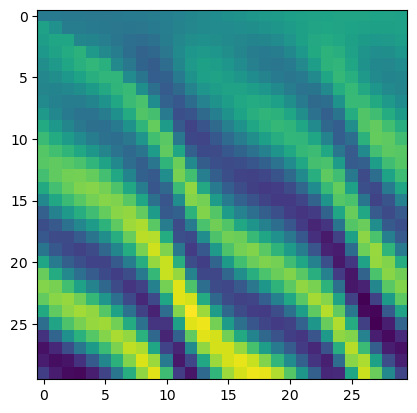

In [389]:
plt.imshow(grid_train[0].grid_tensors_values)

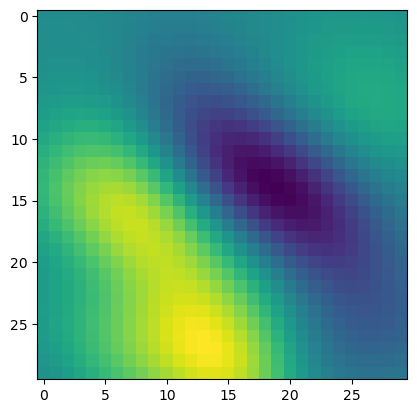

In [392]:
plt.imshow(u_smoothed[0][:,0].reshape((tsteps_coarse+1, nx_coarse)))

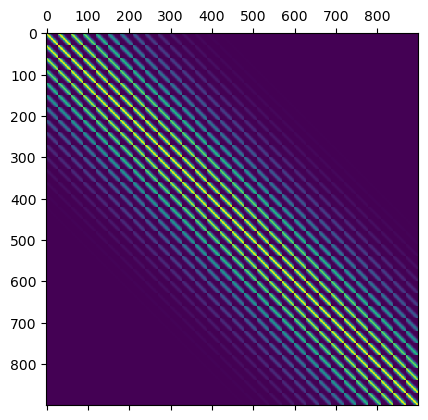

In [393]:
plt.matshow(kdList[0])

In [394]:
u_smoothed[0].shape

(900, 10)

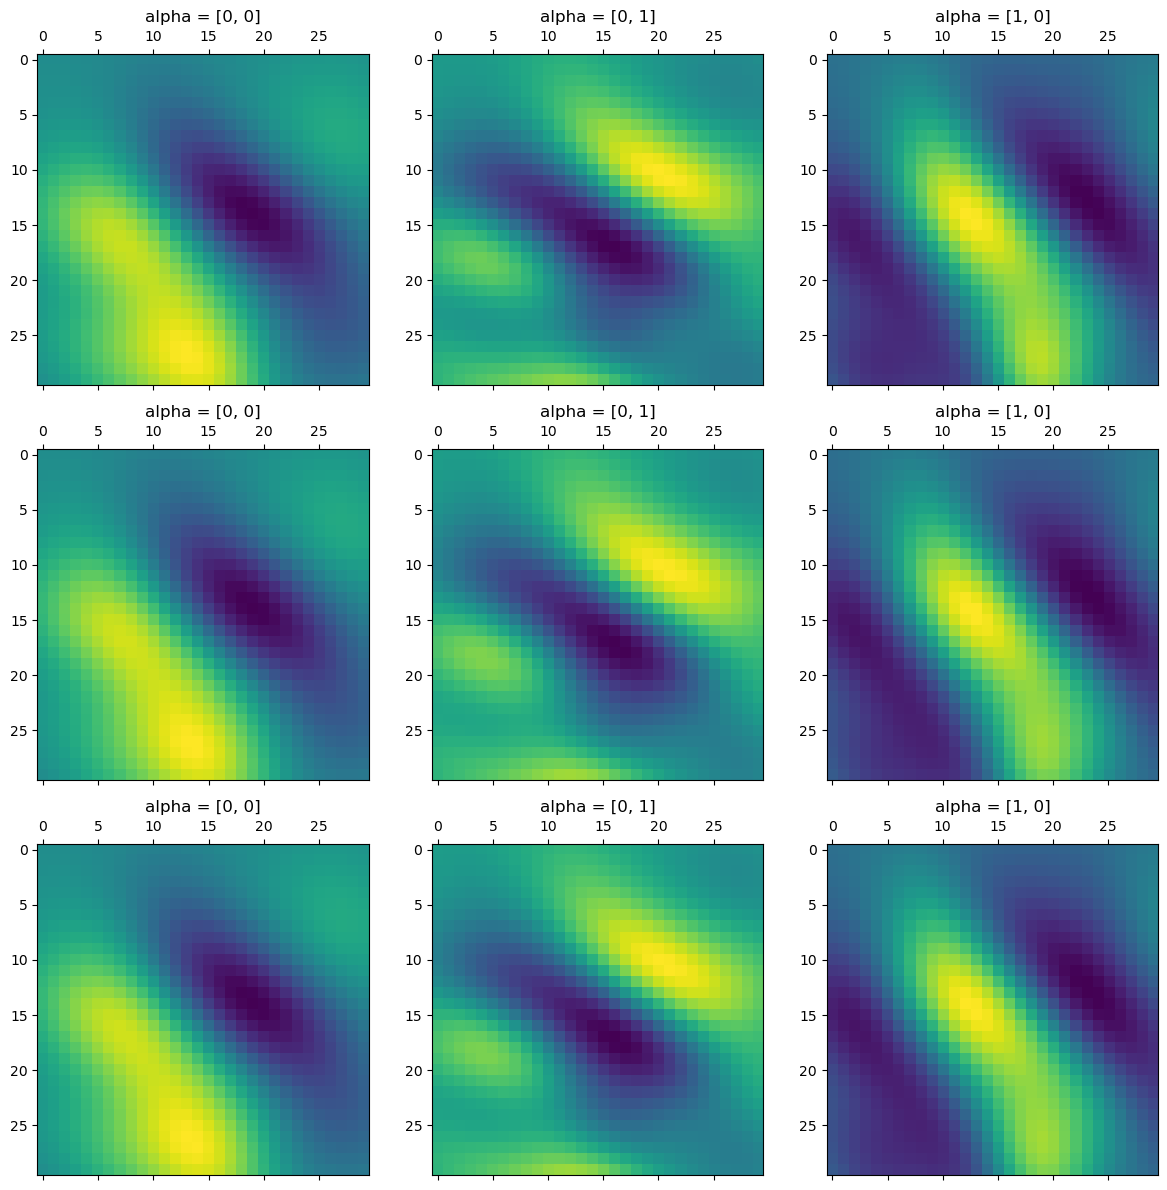

In [395]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    # This line works:
    # u_smoothed[0][:,0].reshape((tsteps+1, nx))
    # This one does not:
    for j in range(3):
        us = u_smoothed[i][:,j].reshape((tsteps_coarse+1, nx_coarse))
        ax[j,i].matshow(us)
        ax[i,j].set_title(f"alpha = {alphas_list[j]}")
        # ax[i,j].show()
plt.tight_layout()

## Assemble features

In [396]:
feature_functions = []

def ident(index, x, u, u_deriv_list):
    """ Identity feature function for the $index$-th derivative of the function"""
    if np.abs(int(index) - index) > 1e-10:
        raise ValueError('Only the first derivative is available')
    if index == 0:
        return u
    else:
        return u_deriv_list[index]
# Get the first 2 derivatives and the function itself
for i in range(1,3):
    pass
    # feature_functions.append(partial(ident, i))

# quadratic feature function
def quadratic(index, x, u, u_deriv_list):
    """ Quadratic feature function for the $index$-th derivative of the function

    The feature function is $u^2$ for the function itself and $2u u'$ for the first derivative.
    """

    if index == 0:
        return u**2
    else:
        return 2*u*u_deriv_list[index]
    # elif index == 1:
        # return 2*u*u_deriv_list[index]

# feature_functions.append(partial(quadratic, 0))
# feature_functions.append(partial(quadratic, 1))
# feature_functions.append(partial(quadratic, 2))

In [397]:
x_grid_list = grid.grid_list  # Get the grid of points as a list
# F0 = KBio.assemble_features(x_grid_list=x_grid_list, u_smoothed=u_smoothed[0], multi_derivatives=u_smoothed, function_list=feature_functions)
F0_train = KBio.assemble_features(x_grid_list=x_grid_list, u_smoothed=u_smoothed[0], multi_derivatives=u_smoothed[1:], function_list=feature_functions, flatten=False)
points_per_example = F0_train.shape[1]

F0_train = F0_train.reshape((-1, F0_train.shape[-1]))
F0_mean = np.mean(F0_train, axis=0)
F0_std = np.std(F0_train, axis=0)
F0 = np.divide((F0_train - F0_mean), F0_std, where = (F0_std != 0))

f_data_flat = f_data_train.reshape(-1)
f_data_flat.shape

(9000,)

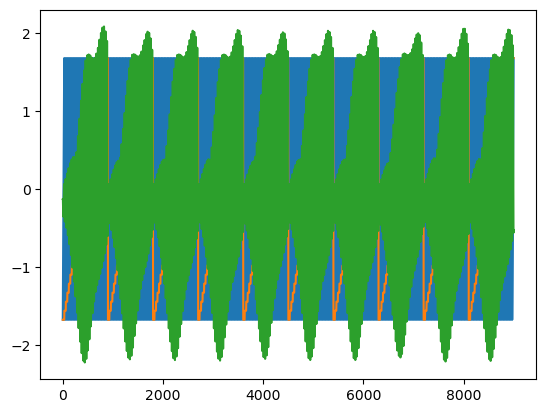

In [398]:
plt.plot(F0[:,0:3])

In [407]:
F0_mean

array([ 5.00000000e-01,  5.00000000e-01,  3.28339837e+07, -8.34866306e+07,
        5.12335832e+07])

In [408]:
F0_std

array([2.98463498e-01, 2.98463498e-01, 2.05993608e+08, 5.41814099e+08,
       6.46561062e+08])

In [409]:
F0.shape

(9000, 5)

In [410]:
# q = KBio.Polynomial(degree=1, c=0)
q = KBio.Gaussian(sigma=1e-1)

In [411]:
f_data_flat.shape

(9000,)

In [412]:
F0.shape

(9000, 5)

In [413]:
# F0_flat = F0.reshape(-1, F0.shape[2])

In [414]:
f_data_flat.shape

(9000,)

In [415]:
predictor, weight_vector = KBio.learn_DE_form(kernel=q, s_features=F0, f_labels=f_data_flat, nugget=1e-1)

In [416]:
matrix, preds = predictor(F0)

(9000, 9000) (9000,)


In [418]:
preds.shape

(9000,)

In [419]:
preds3d = preds.reshape((n_train, tsteps_coarse+1, nx_coarse))

In [420]:
preds3d.shape

(10, 30, 30)

In [421]:
f_data_train[0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  4.28148939e+00,  6.81692803e+00,
         6.57232888e+00,  3.64744286e+00, -7.64920942e-01,
        -4.86533938e+00, -6.98160494e+00, -6.25067518e+00,
        -2.97063340e+00,  1.52087388e+00,  5.39214770e+00,
         7.06442891e+00,  5.85573803e+00,  2.25899597e+00,
        -2.25899597e+00, -5.85573803e+00, -7.06442891e+00,
        -5.39214770e+00, -1.52087388e+00,  2.97063340e+

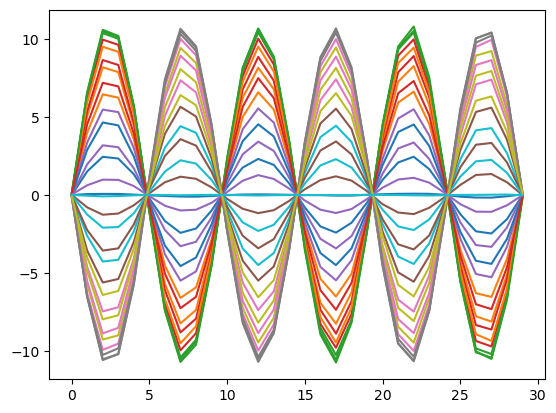

In [427]:
plt.plot(preds3d[0])

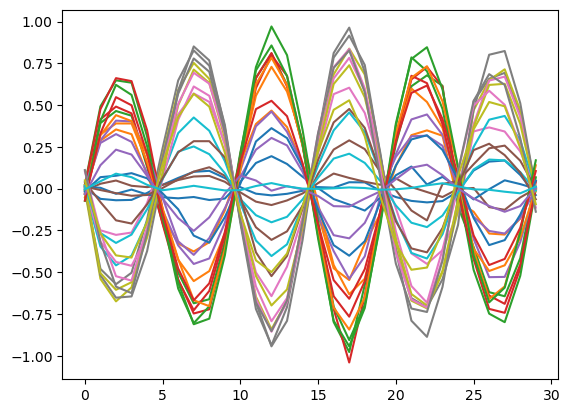

In [423]:
plt.plot(f_data_train[0] - preds3d[0])

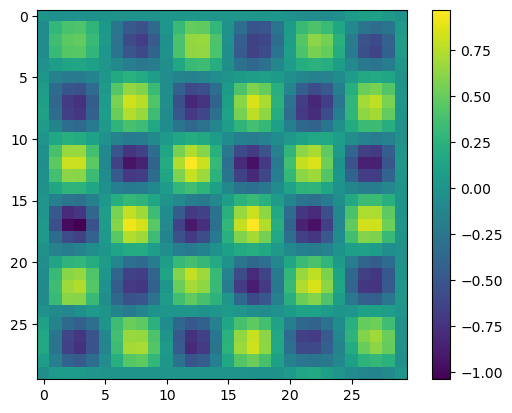

In [429]:
plt.imshow(f_data_train[0].reshape(30,30) - preds3d[0].reshape(30,30))
plt.colorbar()

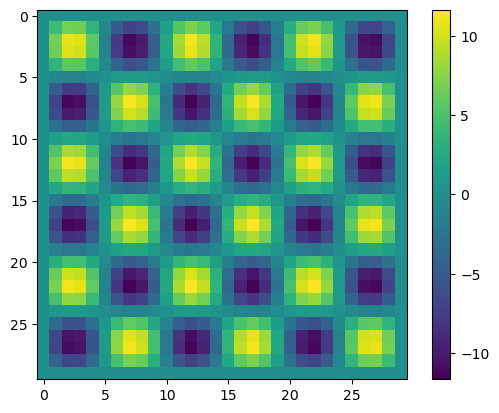

In [430]:
plt.imshow(f_data_train[0].reshape(30,30))
plt.colorbar()

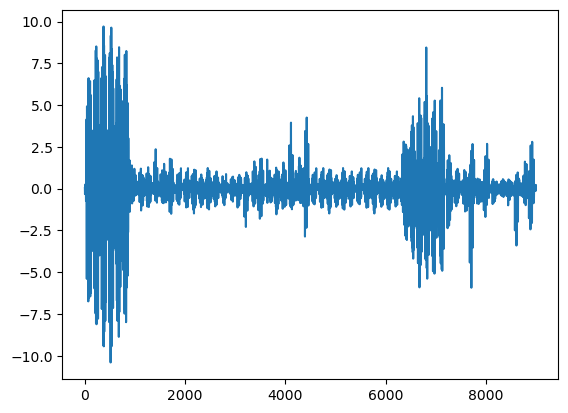

In [431]:
plt.plot(weight_vector)

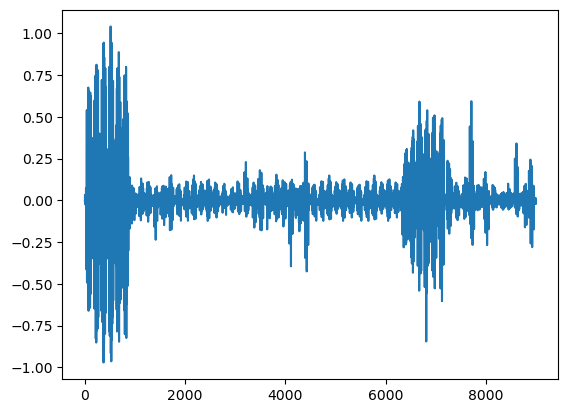

In [432]:
plt.plot(preds - f_data_flat)
# plt.plot()

In [433]:
weight_vector.shape

(9000,)

## Test the model we discovered

In [434]:
f_data_test = np.stack([grid.grid_tensors_forcing for grid in grid_test])

In [435]:
# Reformat the data into a format that can be used by the Kernel
# smoothed_data = []
# smoothed_derivatives = []
# alphas_list = [[0,0], [0,1], [1,0]]
x_data_test = np.asarray([grid.grid_list for grid in grid_test])
# standardize x_data to mean 0 variance 1
# x_mean = np.mean(np.asarray(x_data), axis=1)  # take over middle "points" axis
# x_std = np.std(np.asarray(x_data), axis=1)
x_data_test = (x_data_test - x_mean[0,:]) / x_std[0,:]

y_data_test = np.stack([grid.grid_tensors_values for grid in grid_test])
y_data_test = y_data_test.reshape((n_test, -1))
# y_data += np.random.normal(0, 1e-3, y_data.shape)
f_data_test = np.stack([grid.grid_tensors_forcing for grid in grid_test])

z_test, kdList_test, u_smoothed_test = KBio.kernel_smoothing(p, x_grid = x_data_test, u_data = y_data_test, f_data = f_data_test, alpha_list=alphas_list, nugget=nugget_smoothing)
# u_smoothed

n_grid_pts:  900


In [436]:
F0_test = KBio.assemble_features(x_grid_list=x_grid_list, u_smoothed=u_smoothed_test[0], multi_derivatives=u_smoothed_test[1:], function_list=feature_functions, flatten=False)
# standardize the test data
F0_test = F0_test.reshape((-1, F0_test.shape[-1]))
# F0_mean = np.mean(F0_train, axis=0)
# F0_std = np.std(F0_train, axis=0)


F0_test = np.divide((F0_test - F0_mean), F0_std, where = (F0_std != 0))

f_data_flat_test = f_data_test.reshape(-1)
f_data_flat_test.shape

(18000,)

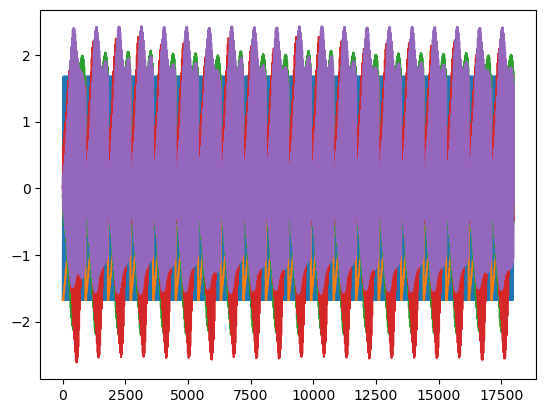

In [437]:
plt.plot(F0_test)

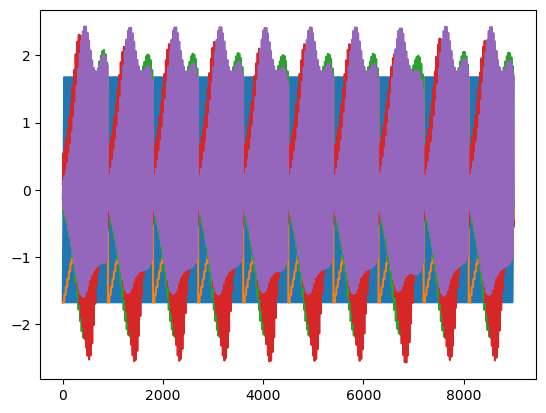

In [438]:
plt.plot(F0)

In [439]:
k_new, preds_all = predictor(F0_test)
preds_all = preds_all.reshape((n_test, tsteps_coarse+1, nx_coarse))

(18000, 9000) (9000,)


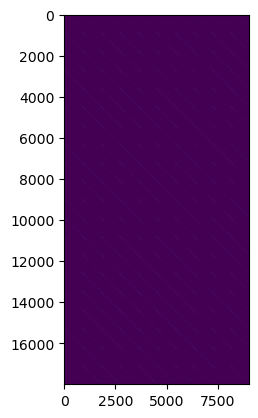

In [441]:
plt.imshow(k_new)

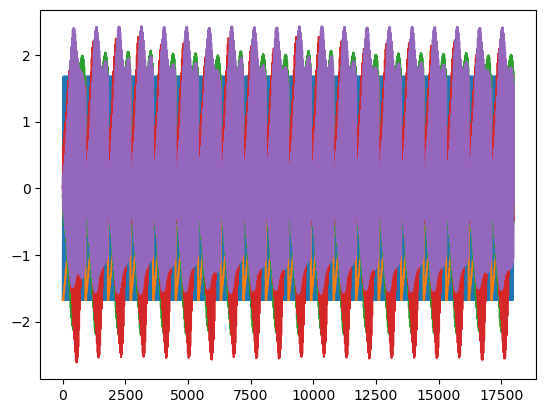

In [444]:
plt.plot(F0_test)

In [445]:
preds_all.mean()

-0.0025088754942927134

preds_all = []
for i in range(n_test):
# for i in range(1):
    print(i)
    # Pull out the predictor for the i-th example, in blocks of points_per_example
    # data = F0_test[i*points_per_example:(i+1)*points_per_example,:]
    k_new, preds = predictor(data)
    # reshape preds into the original shape
    preds = preds.reshape((tsteps_coarse+1, nx_coarse))
    preds_all.append(preds)

In [446]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


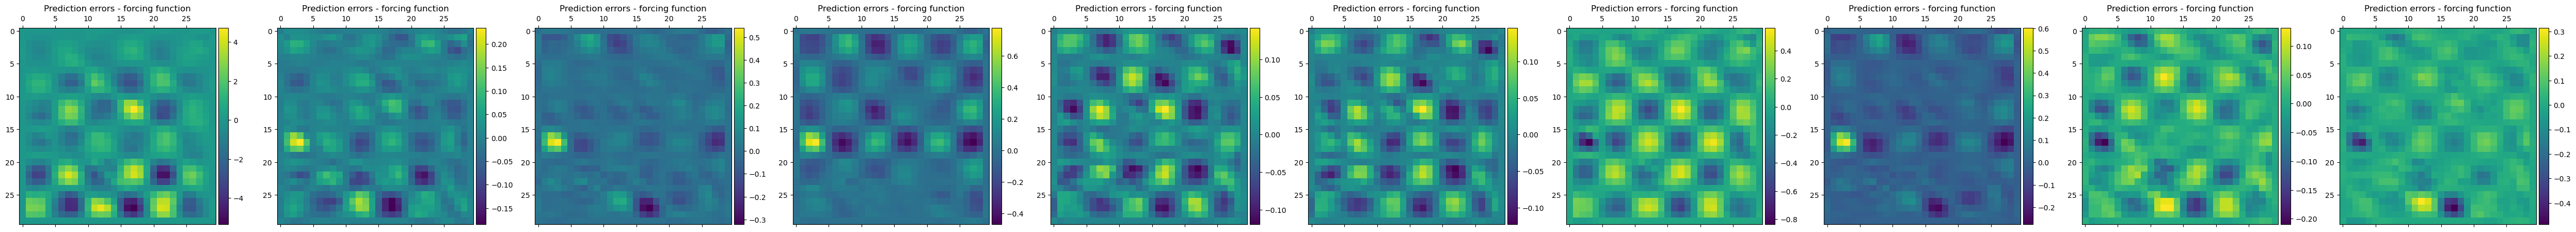

In [450]:
# n_test = 2
n_test = 10
fig, ax = plt.subplots(1, n_test, figsize=(5* n_test,5))
for i in range(n_test):
    pr = preds_all[i]#.reshape((tsteps_coarse+1, nx_coarse))
    im = ax[i].matshow(pr - f_data_test[i], label='Predicted')
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ax[i].set_title("Prediction errors - forcing function")
    # ax[i].set_colorbar(im)
    fig.colorbar(im, cax=cax, orientation='vertical')
    # ax[i].matshow(f_data_test[i], label='True')
plt.tight_layout()

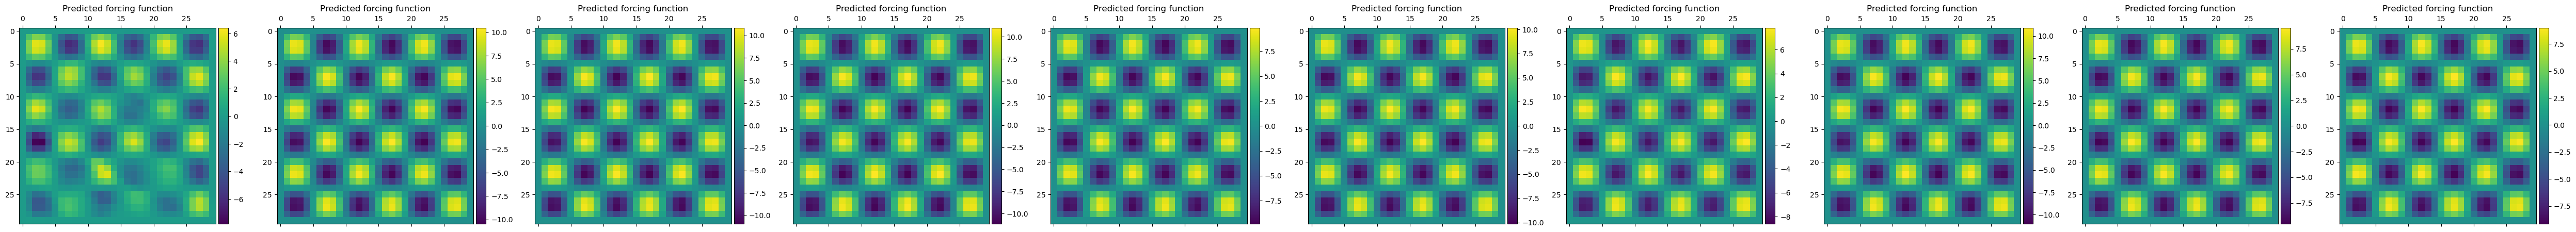

In [451]:

fig, ax = plt.subplots(1, n_test, figsize=(5 * n_test, 5))
for i in range(n_test):
    pr = preds_all[i]#.reshape((tsteps_coarse+1, nx_coarse))
    im = ax[i].matshow(pr, label='Predicted')
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ax[i].set_title("Predicted forcing function")
    # ax[i].set_colorbar(im)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()    # ax[i].matshow(f_data_test[i], label='True')

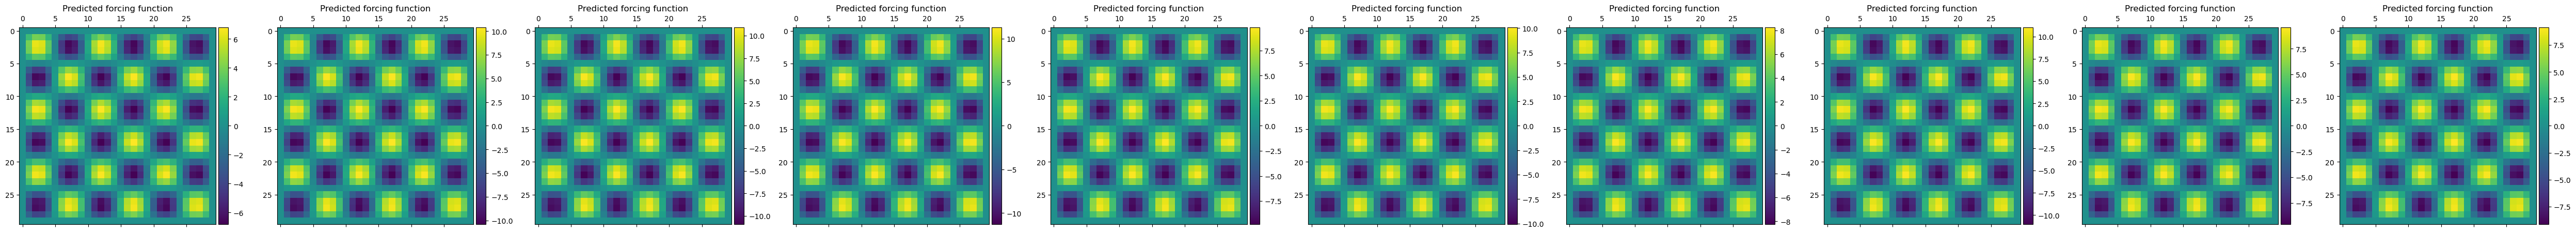

In [452]:

fig, ax = plt.subplots(1, n_test, figsize=(5 * n_test, 5))
for i in range(n_test):
    pr = preds_all[i]#.reshape((tsteps_coarse+1, nx_coarse))
    im = ax[i].matshow(f_data_test[i], label='Predicted')
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ax[i].set_title("Predicted forcing function")
    # ax[i].set_colorbar(im)
    fig.colorbar(im, cax=cax, orientation='vertical')
    # ax[i].matshow(f_data_test[i], label='True')
plt.tight_layout()